In [38]:
from mcspace.utils import pickle_load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.patches as mpatches

In [39]:
pwd

'C:\\Users\\Gary2\\Dropbox (Partners HealthCare)\\research_bwh\\MCSPACE\\MCSPACE\\mcspace\\paper\\figures'

In [40]:
outpath = Path("./")

In [41]:
cvpath = Path("../cross_validation")

In [42]:
respath = cvpath / "cv_holdout_results"

In [43]:
res = pickle_load(respath / "results.pkl")

In [44]:
res = pd.DataFrame(res)

In [45]:
res

,model,case,fold,read depth,particle id,cosine distance
0,mcspace,Human_1_H11,0,1226.0,0,0.024404
1,mcspace,Human_1_H11,0,3430.0,1,0.503985
2,mcspace,Human_1_H11,0,7284.0,2,0.760657
3,mcspace,Human_1_H11,0,6348.0,3,0.161292
4,mcspace,Human_1_H11,0,8145.0,4,0.125906
...,...,...,...,...,...,...
25867,gmm_two_dim,Mouse_76_JX10,4,1672.0,75,0.750641
25868,gmm_two_dim,Mouse_76_JX10,4,6474.0,76,0.900993
25869,gmm_two_dim,Mouse_76_JX10,4,2972.0,77,0.910685
25870,gmm_two_dim,Mouse_76_JX10,4,1623.0,78,0.588842


In [8]:
res['model'].unique()

array(['mcspace', 'gmm_basic', 'gmm_one_dim', 'gmm_two_dim'], dtype=object)

In [9]:
res['case'].unique()

array(['Human_1_H11', 'Human_2_H11', 'Human_3_H11', 'Human_4_H11',
       'Human_5_H11', 'Mouse_10_JX10', 'Mouse_18_JX10', 'Mouse_35_JX10',
       'Mouse_43_JX10', 'Mouse_57_JX10', 'Mouse_65_JX10', 'Mouse_76_JX10'],
      dtype=object)

In [10]:
case = 'Human_1_H11'
subset = res.loc[res['case']==case,:]

In [11]:
cases = res['case'].unique()

In [12]:
# holdout_model_order = ['mcspace', 'gmm_basic', 'gmm_one_dim', 'gmm_two_dim']
# palette = ['tab:blue', 'tab:red', 'tab:purple', 'tab:brown'] 

# for case in cases:
#     subset = res.loc[res['case']==case,:]
#     fig, ax = plt.subplots()
#     ax=sns.boxplot(data=subset, x='model', y='cosine distance', ax=ax, palette=palette, order=holdout_model_order, linewidth=2)
#     ax=sns.stripplot(data=subset, x='model', y='cosine distance', ax=ax, color='black', alpha=0.2)
#     ax.set_title(case)

In [13]:
def remove_ylabels(axs):
    for i in range(1,len(axs)):
        plt.setp(axs[i].get_yticklabels(), visible=False)
    return axs

In [20]:
human_cases = ['Human_1_H11', 'Human_2_H11', 'Human_3_H11', 'Human_4_H11','Human_5_H11']
mouse_cases = ['Mouse_10_JX10', 'Mouse_18_JX10', 'Mouse_35_JX10','Mouse_43_JX10', 'Mouse_57_JX10', 'Mouse_65_JX10', 'Mouse_76_JX10']
mouse_names = ['Day 10', 'Day 18', 'Day 35', 'Day 43', 'Day 57', 'Day 65', 'Day 76']

In [21]:
holdout_model_order = ['mcspace', 'gmm_basic', 'gmm_one_dim', 'gmm_two_dim']
palette = ['tab:blue', 'tab:red', 'tab:purple', 'tab:brown'] 

C:\Users\Gary2\AppData\Local\Temp\ipykernel_22628\1513980649.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs_human[i]=sns.boxplot(data=subset, x='model', y='cosine distance', ax=axs_human[i], palette=palette, order=holdout_model_order, linewidth=2)
C:\Users\Gary2\AppData\Local\Temp\ipykernel_22628\1513980649.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs_human[i]=sns.boxplot(data=subset, x='model', y='cosine distance', ax=axs_human[i], palette=palette, order=holdout_model_order, linewidth=2)
C:\Users\Gary2\AppData\Local\Temp\ipykernel_22628\1513980649.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

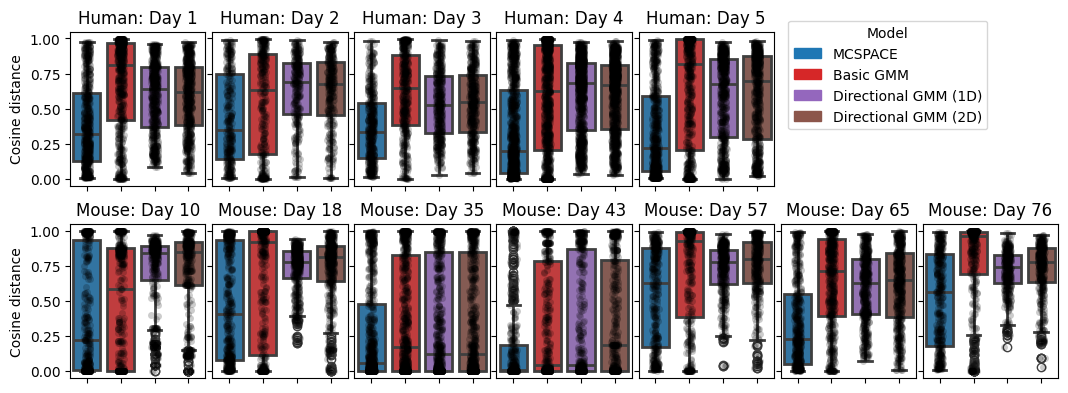

In [37]:
scale = 1.5
fig = plt.figure(figsize=(scale*8.5,scale*3))
gs = fig.add_gridspec(ncols=7,nrows=2, wspace=0.05, hspace=0.25)

axs_human = []
axs_mouse = []
for i in range(5):
    axs_human.append(fig.add_subplot(gs[0,i]))
    if i > 0:
        axs_human[i].sharey(axs_human[i-1])
        
for i in range(7):
    axs_mouse.append(fig.add_subplot(gs[1,i]))
    if i > 0:
        axs_mouse[i].sharey(axs_mouse[i-1])
        
for i,case in enumerate(human_cases):
    subset = res.loc[res['case']==case,:]
    axs_human[i]=sns.boxplot(data=subset, x='model', y='cosine distance', ax=axs_human[i], palette=palette, order=holdout_model_order, linewidth=2)
    axs_human[i]=sns.stripplot(data=subset, x='model', y='cosine distance', ax=axs_human[i], color='black', alpha=0.2)
    axs_human[i].set_title(f"Human: Day {i+1}")
    axs_human[i].set_xticklabels("")
    axs_human[i].set_xlabel("")
    axs_human = remove_ylabels(axs_human)
    axs_human[0].set_ylabel("Cosine distance")

    
for i,case in enumerate(mouse_cases):
    subset = res.loc[res['case']==case,:]
    axs_mouse[i]=sns.boxplot(data=subset, x='model', y='cosine distance', ax=axs_mouse[i], palette=palette, order=holdout_model_order, linewidth=2)
    axs_mouse[i]=sns.stripplot(data=subset, x='model', y='cosine distance', ax=axs_mouse[i], color='black', alpha=0.2)
    axs_mouse[i].set_title(case)
    axs_mouse[i].set_xticklabels("")
    axs_mouse[i].set_xlabel("")
    axs_mouse[i].set_title(f"Mouse: {mouse_names[i]}")
    axs_mouse = remove_ylabels(axs_mouse)
    axs_mouse[0].set_ylabel("Cosine distance")

# legend ===============================================
lines_labels = [axs_human[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
mod_sub = [0,1,2,3]
lines = [mpatches.Patch(color=c) for c in palette]
# labels = [labels[i] for i in mod_sub]
labels = ['MCSPACE','Basic GMM', 'Directional GMM (1D)', 'Directional GMM (2D)']
# labels = ['MCSPACE', "Fisher's exact",  'Basic GMM'] #, 'Directional GMM (1D)', 'Directional GMM (2D)']
fig.legend(lines, labels, title='Model', loc='upper right', bbox_to_anchor=(0.85,0.92), ncol=1)
plt.savefig(outpath / "holdout_results.png", bbox_inches="tight")

In [25]:
lines

[]

In [26]:
labels

[]